In [1]:
import ANNarchy as ann

ANNarchy 4.6 (4.6.9.7) on linux (posix). 


In [2]:
Izhikevich_Hamker = ann.Neuron(
parameters="""
    a = 0.02
    b = 0.2
    c = -72.0
    d = 6.0
    n0 = 140.
    n1 = 5.0
    n2 = 0.04
    I = 0.0
    tau_refrac = 10.0
    tau_ampa = 10.0
    tau_gaba = 10.0
    E_ampa = 0.0
    E_gaba = -90.0
    tau_syn = 1.0
    C = 1.0
    v_th = 30.0
""",
equations="""
    I_syn_ex = - g_ampa*(v-E_ampa)
    I_syn_in = - g_gaba*(v-E_gaba)
    I_syn = I_syn_ex + I_syn_in - g_base*v
    dg_base/dt = -g_base/tau_syn : init = 0
    dg_ampa/dt = -g_ampa/tau_ampa : init = 0
    dg_gaba/dt = -g_gaba/tau_gaba : init = 0
    dv/dt = n2*v*v+n1*v+n0 - u/C  + I + I_syn : init = -72.0
    du/dt = a*(b*(v)-u) : init = -14.4
""",
spike = """
    v>=v_th
""",
reset = """
    v = c
    u = u+d
""",
refractory = """tau_refrac"""
)

In [3]:
exc1 = ann.Population(1, neuron=Izhikevich_Hamker)

In [4]:
stimE1 = ann.PoissonPopulation(1, rates=10.0)
proj = ann.Projection(pre=stimE1, post=exc1, target="base")
proj.connect_one_to_one(weights=1.0)

In [5]:
record_from = ["v", "u", "I_syn", "I_syn_ex", "I_syn_in", "g_base", "g_ampa", "g_gaba"]
n_vars = len(record_from)
exc1_m = ann.Monitor(exc1, record_from, period=1.0) 
exc1_spikes_rec = ann.Monitor(exc1, "spike") 

In [6]:
try:
    import shutil
    shutil.rmtree("./annarchy")
    print("Deleted previously compiled network!")
except:
    print("No previously compiled network to delete!")
ann.compile()

No previously compiled network to delete!
Compiling... 
OK 


In [7]:
simulation_time = 10000.0 # ms
ann.simulate(simulation_time, measure_time=True)

Simulating 10.0 seconds of the network took 0.017061471939086914 seconds. 


In [8]:
ts = exc1_m.times()
exc1_ts = exc1_m.get()
spikes = exc1_spikes_rec.get("spike")
spike_times, spike_senders = exc1_spikes_rec.raster_plot(spikes)

In [9]:
ts

{'v': {'start': [0], 'stop': [0]},
 'u': {'start': [0], 'stop': [0]},
 'I_syn': {'start': [0], 'stop': [0]},
 'I_syn_ex': {'start': [0], 'stop': [0]},
 'I_syn_in': {'start': [0], 'stop': [0]},
 'g_base': {'start': [0], 'stop': [0]},
 'g_ampa': {'start': [0], 'stop': [0]},
 'g_gaba': {'start': [0], 'stop': [0]}}

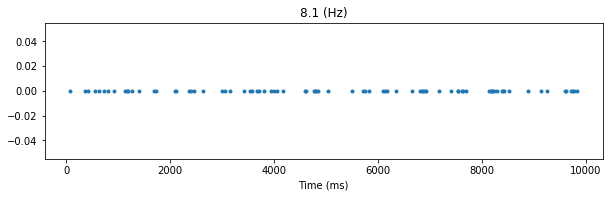

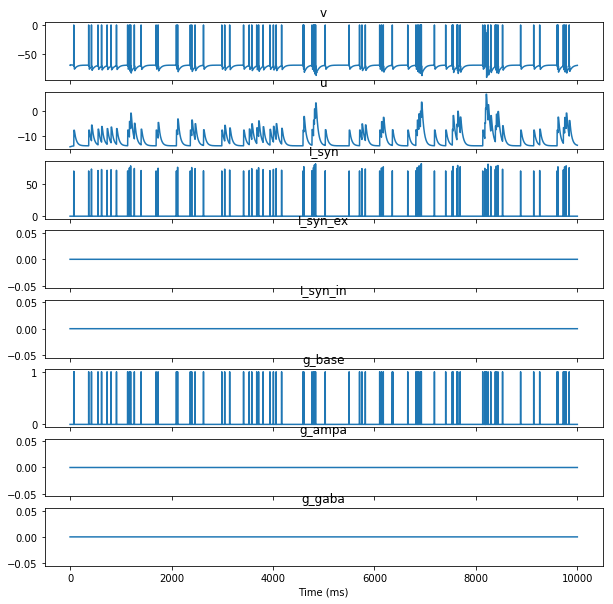

In [9]:
import numpy as np
from matplotlib import pyplot
pyplot.close("all")
rate = len(spike_times) / simulation_time * 1000
f1 = pyplot.figure(figsize=(10, 2.5))
pyplot.plot(spike_times, spike_senders, ".")
pyplot.xlabel("Time (ms)")
pyplot.title("%g (Hz)" % rate)
pyplot.show()
f2, axes = pyplot.subplots(n_vars, 1, sharex=True, figsize=(10, 10))
for i_var, var in enumerate(record_from):
    varts = exc1_ts[var]
    axes[i_var].plot(np.arange(ts[var]["start"][0], len(varts)*exc1_m.period, exc1_m.period), varts)
    axes[i_var].set_title(var)
axes[-1].set_xlabel("Time (ms)")
pyplot.show()

In [10]:
params = {}
for attr in exc1.attributes:
    params[attr] = getattr(exc1, attr)
print (params)

{'a': array([0.02]), 'b': array([0.2]), 'c': array([-72.]), 'd': array([6.]), 'n0': array([140.]), 'n1': array([5.]), 'n2': array([0.04]), 'I': array([0.]), 'tau_refrac': array([10.]), 'tau_ampa': array([10.]), 'tau_gaba': array([10.]), 'E_ampa': array([0.]), 'E_gaba': array([-90.]), 'tau_syn': array([1.]), 'C': array([1.]), 'v_th': array([30.]), 'I_syn_ex': array([0.]), 'I_syn_in': array([-0.]), 'I_syn': array([0.]), 'g_base': array([0.]), 'g_ampa': array([0.]), 'g_gaba': array([0.]), 'v': array([-70.35306473]), 'u': array([-13.79241025]), 'r': array([0.])}
